In [1]:
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

to_icm = 33.356

plt.style.use("../paper_small.mplstyle")


Path().absolute()

PosixPath('/Users/flokno/working/projects/tdep/Raman/paper_raman_data/figure_04')

In [2]:
_col = "temperature"
df_exp = pd.read_csv("data_voigt_fit_all_temperatures_most_prominent_1010.csv")
df_exp = df_exp.sort_values(["x0", "temperature"])
df_exp = df_exp[df_exp["temperature"] > 100]
df = pd.read_csv("data_peaks.csv")

In [3]:
imodes = df["mode"].unique()
imodes
df[df["mode"] == 0]
# df

,temperature,mode,peak_mid,peak_fwhm
0,0.0,0,3.993450,0.000645
5,50.0,0,3.993353,0.000705
10,100.0,0,3.992542,0.001221
15,150.0,0,3.991130,0.001953
20,200.0,0,3.989441,0.002751
25,250.0,0,3.987622,0.003576
30,300.0,0,3.985733,0.004408
35,350.0,0,3.983804,0.005238
40,400.0,0,3.981847,0.006063


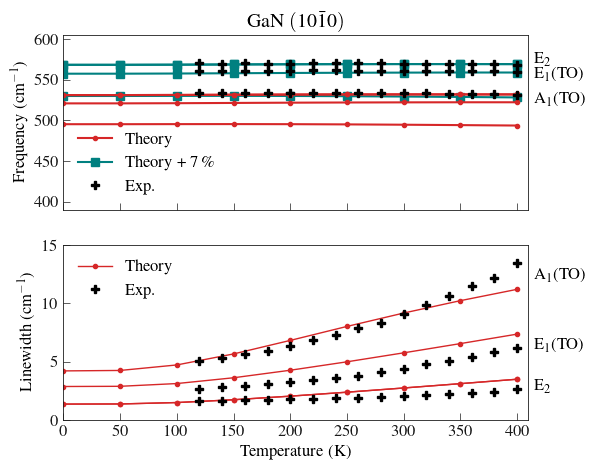

In [4]:
# Lineshifts and linewidths in one plot



fig, axs = plt.subplots(2, 1, figsize=(6, 5), sharex=True)
ms = 6


# linewidths
ax = axs[1]
for imode in imodes[1:]:
    _df = df[df["mode"] == imode]
    _x, _y = _df.temperature, to_icm * _df.peak_fwhm
    kw = {"color": "C3", "marker": ".", "ms": ms, "lw": 1}
    ax.plot(_x, _y, label="Theory" if imode == 1 else None, **kw)

# exp LO
_df = df_exp
ax.plot(_df.temperature, _df.Gamma, marker="P", ms=ms, lw=0, color="k", label="Exp.")

ax.set_ylim(0, 15)
ax.set_ylabel("Linewidth (cm$^{-1}$)")
ax.legend(loc=2, frameon=False, markerfirst=True)


# lineshifts
ax = axs[0]
for imode in imodes[1:]:
    _df = df[df["mode"] == imode]
    _x, _y = _df.temperature, to_icm * _df.peak_mid
    kw = {"color": "C3", "marker": ".", "ms": ms, "zorder": 1}
    ax.plot(_x, _y, label="Theory" if imode == 1 else None, **kw)

    kw = {"color": "teal", "marker": "s", "ms": ms, "zorder": 0}
    ax.plot(_x, 1.07 * _y, label=r"Theory + $7\,\%$" if imode == 1 else None, **kw)

# exp LO
_df = df_exp
kw = {"marker": "P", "ms": ms, "color": "k", "lw": 0, "zorder": 2}
ax.plot(_df.temperature, _df.x0, label="Exp.", **kw)
ax.set_ylabel("Frequency (cm$^{-1}$)")
ax.set_ylim(390, 605)
ax.legend(loc=3, frameon=False, markerfirst=True)

ax = axs[1]
ax.set_xlabel("Temperature (K)")

axs[0].set_title("GaN $(10\\bar{1}0)$")

# put mode labels
ax.set_xlim(0, 410)
ax = axs[0]
ax.text(415, 570, "E$_2$")
ax.text(415, 550, "E$_1$(TO)")
ax.text(415, 520, "A$_1$(TO)")

ax = axs[1]
ax.text(415, 12, "A$_1$(TO)")
ax.text(415, 6, "E$_1$(TO)")
ax.text(415, 2.5, "E$_2$")

file = "plot_lineshifts_and_linewidths_1010.pdf"
fig.savefig(file)
fig.savefig(Path(file).stem + ".png")